In [1]:
# Import all necessary libraries for this example

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import DCCSMLM

%matplotlib notebook

In [2]:
# Load reference proteins from the "CalibrationValues.csv" file as also shown in the "Calibration_Example" notebook.
# The "rate_mVenus" column contains the determined colocalization ratios over several experiments and the known
# oligomeric states in the "stoichiometry" column.
reference = DCCSMLM.DCCReferenceProteins("ExampleData/CalibrationValues.csv", "rate_mVenus", "stoichiometry")


n_bootstrap = 10000 # Number of bootstrap resamples
n_max = 4 # Maximum oligomeric state to consider
only_consider_p = True # Set this to True if you want to use Eq. 1 (only p, no m)

In [3]:
# In our example, we will determine the oligomeric state of proteins from the SLC17A family.
# First, we load the data from all investigated proteins. The "rate_mVenus" column contains the observed
# colocalization ratios.
vglut1 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_vGlut1.csv", "rate_mVenus")
vglut2 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_vGlut2.csv", "rate_mVenus")
vglut3 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_vGlut3.csv", "rate_mVenus")
sialin = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_sialin.csv", "rate_mVenus")

# Create a dictionary that contains the different SLC17A proteins
vglut = {"vGlut1": vglut1, "vGlut2": vglut2, "vGlut3": vglut3, "Sialin": sialin}



<IPython.core.display.Javascript object>


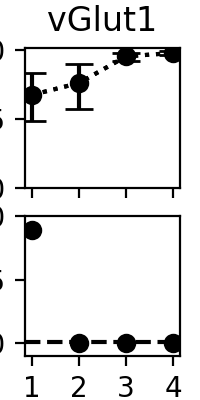

<IPython.core.display.Javascript object>


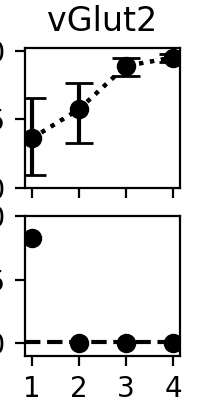

<IPython.core.display.Javascript object>


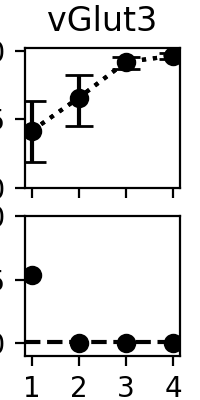

<IPython.core.display.Javascript object>


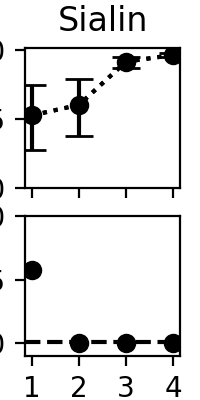

In [4]:
# Iterate over the different proteins in the vglut dictionary
for isoform in vglut:
    
    # Calculate the coefficient of mismatch (COM) using bootstrap resampling. Only compare to oligomeric states
    # up to n_max. 
    vglut[isoform].com_bootstrap(n_bootstrap, reference, reference_bootstrap=True, 
                                 max_n=n_max, only_p=only_consider_p)
    # Perform the Kolmogorov-Smirnov (KS) test to compare the observed distribution to the distribution
    # of the reference proteins. This could be performed even if no p or m have been calculated.
    vglut[isoform].KS(reference, save_results=True)

    
    ###### Plot the results
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(1,2))
    
    # First, plot the mean COM values
    ax1.plot(range(1,n_max+1), vglut[isoform].bs_mean, marker="o", ls=":", color="black")
    
    # Now, plot the 95% CI of the COM
    ax1.errorbar(range(1,n_max+1), vglut[isoform].bs_mean, yerr=
                 [(vglut[isoform].bs_mean-vglut[isoform].bs_lower_ci),
                 (vglut[isoform].bs_upper_ci-vglut[isoform].bs_mean)],
                capsize=5, ls=":", color="black")
    ax1.set_yticks([0.0, 0.5, 1.0])
    
    ax1.set_ylabel("M$^2$(n)")
    
    ax1.set_title(isoform)
    
    # Now, plot the KS results
    ax2.plot(range(1, n_max+1), vglut[isoform].ks, lw=0, marker="o", color="black")
    ax2.set_ylim(-0.1,1)
    ax2.set_ylabel("K.-S.")
    ax2.set_xlabel("Oligomeric state")
    ax2.axhline(0.05/n_max, color="black", ls="--")
    ax2.set_yticks([0.0, 0.5, 1.0])
    ax2.set_xticks([1,2,3,4])
    

    plt.show()

In [5]:
# In this example, we will determine the oligomeric state of proteins from the SLC26A family.
# First, we load the data from all investigated proteins. The "rate_mVenus" column contains the observed
# colocalization ratios.
slc26a3 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_SLC26A3.csv", "rate_mVenus")
prestin = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_prestin.csv", "rate_mVenus")

# Create a dictionary that contains the different SLC26A proteins
slc26 = {"SLC26A3": slc26a3, "SLC26A5": prestin}



<IPython.core.display.Javascript object>


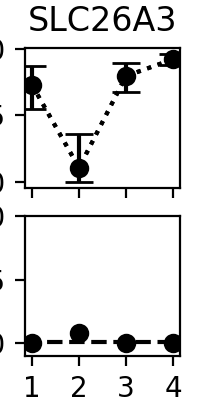

<IPython.core.display.Javascript object>


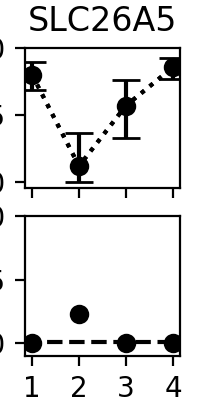

In [6]:
# Iterate over the different proteins in the slc26 dictionary

for isoform in slc26:
    
    # Calculate the coefficient of mismatch (COM) using bootstrap resampling. Only compare to oligomeric states
    # up to n_max. 
    slc26[isoform].com_bootstrap(n_bootstrap, reference, reference_bootstrap=True, max_n=n_max, only_p=only_consider_p)

    # Perform the Kolmogorov-Smirnov (KS) test to compare the observed distribution to the distribution
    # of the reference proteins. This could be performed even if no p or m have been calculated.   
    slc26[isoform].KS(reference, save_results=True)
    
    
    ###### Plot the results
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(1,2))

    # First, plot the mean COM values
    ax1.plot(range(1,n_max+1), slc26[isoform].bs_mean, marker="o", ls=":", color="black")

    # Now, plot the 95% CI of the COM
    ax1.errorbar(range(1,n_max+1), slc26[isoform].bs_mean, yerr=
                 [(slc26[isoform].bs_mean-slc26[isoform].bs_lower_ci),
                 (slc26[isoform].bs_upper_ci-slc26[isoform].bs_mean)],
                capsize=5, ls=":", color="black")
    ax1.set_yticks([0.0, 0.5, 1.0])
    ax1.set_ylabel("M$^2$(n)")
    
    ax1.set_title(isoform)

    # Now, plot the KS results
  
    ax2.plot(range(1, n_max+1), slc26[isoform].ks, lw=0, marker="o", color="black")
    ax2.set_ylim(-0.1,1)
    ax2.set_ylabel("K.-S.")
    ax2.set_xlabel("Oligomeric state")
    ax2.axhline(0.05/n_max, color="black", ls="--")
    ax2.set_yticks([0.0, 0.5, 1.0])
    ax2.set_xticks([1,2,3,4])
  
    plt.show()